# Decision Trees

In [1]:
# Common imports
import numpy as np

# to make this notebook's output stable across runs
np.random.seed(42)

# To plot pretty figures
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)

In [2]:
from sklearn.datasets import load_iris
from sklearn.tree import DecisionTreeClassifier, export_graphviz

iris = load_iris()
X = iris.data[:, 2:] #petal length and width
y = iris.target

tree_clf = DecisionTreeClassifier(max_depth=2, random_state=42)
tree_clf.fit(X, y)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=2,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=42,
            splitter='best')

One of the many qualities of Decision Trees is that they require
very little data preparation. In particular, they don’t require feature scaling or centering at all.

In [3]:
#First install graphivz on your PC and then type in your conda prompt "conda install graphviz"
import graphviz
import os
os.chdir('C:/Users/HP/Anaconda3/Library/bin/graphviz')

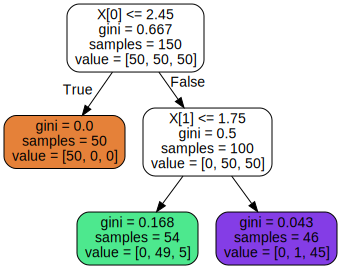

In [4]:
export_graphviz(tree_clf,
                out_file='tree.dot',
                filled=True,
                rounded=True)

with open("tree.dot") as f:
    dot_graph=f.read()
graphviz.Source(dot_graph)

Node’s gini attribute measures its impurity: a node is “pure” (gini=0) if all training instances it applies to belong to the same
class.

$G_{i} = 1- \sum_{k=1}^{n} p_{i,k}^2$

where $p_{i,k}$ is the ratio of class $k$ instances among the training instances in the $i^{th}$ node.

## The CART training algorithm

Scikit-Learn uses the Classification And Regression Tree (CART) algorithm to train Decision Trees. The idea is really quite simple: the algorithm first splits the training set in two subsets using a single feature $k$ and a threshold $t_k$ (e.g., “petal length ≤ 2.45 cm”). How does it choose $k$ and $t_k$? It searches for the pair ($k$, $t_k$) that produces the purest subsets (weighted by their size).

$ J(k, t_k) = \frac{m_{left}}{m}G_{left} + \frac{m_{right}}{m}G_{right}$

where:

- $G_{left/right}$ measures the impurity of the left/right subset
- $m_{left/right}$ is the number of instances in the left/right subset

Once it has successfully split the training set in two, it splits the subsets using the same logic, then the sub-subsets and so on, recursively. It stops recursing once it reaches the maximum depth (defined by the max_depth hyperparameter), or if it cannot find a split that will reduce impurity.

## Gini Impurity or Entropy?

By default, the Gini impurity measure is used, but you can select the entropy impurity measure instead by setting the criterion hyperparameter to "entropy". In Machine Learning, it is frequently used as an impurity measure: a set’s entropy is zero when it contains instances of only one class.

$H_{i} = - \sum_{k=1}^{n} p_{i,k} log(p_{i,k})$

So should you use Gini impurity or entropy? The truth is, most of the time it does not make a big difference: they lead to similar trees. Gini impurity is slightly faster to compute, so it is a good default. However, when they differ, Gini impurity tends to isolate the most frequent class in its own branch of the tree, while entropy tends to
produce slightly more balanced trees.

## Regularization Hyperparameters

Such a model is often called a nonparametric model, not because it does not have any parameters (it often has a lot) but because the
number of parameters is not determined prior to training, so the model structure is free to stick closely to the data. In contrast, a parametric model such as a linear model has a predetermined number of parameters, so its degree of freedom is limited, reducing the risk of overfitting (but increasing the risk of underfitting).

To avoid overfitting the training data, you need to restrict the Decision Tree’s freedom during training. As you know by now, this is called regularization. The regularization hyperparameters depend on the algorithm used, but generally you can at least restrict
the maximum depth of the Decision Tree. In Scikit-Learn, this is controlled by the max_depth hyperparameter (the default value is None, which means unlimited). Reducing max_depth will regularize the model and thus reduce the risk of overfitting.

## Pruning

Other algorithms work by first training the Decision Tree without
restrictions, then pruning (deleting) unnecessary nodes. A node
whose children are all leaf nodes is considered unnecessary if the
purity improvement it provides is not statistically significant. Standard statistical tests, such as the χ2 test, are used to estimate the probability that the improvement is purely the result of chance
(which is called the null hypothesis). If this probability, called the pvalue, is higher than a given threshold (typically 5%, controlled by a hyperparameter), then the node is considered unnecessary and its children are deleted. The pruning continues until all unnecessary nodes have been pruned.

## Instability

However they do have a few limitations. First, as you may have noticed, Decision Trees love orthogonal decision boundaries (all splits are perpendicular to an axis), which makes them sensitive to training set rotation.

One way to limit this problem is to use PCA.

More generally, the main issue with Decision Trees is that they are very sensitive to small variations in the training data.

Random Forests can limit this instability by averaging predictions over many trees.